In [54]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision

In [55]:
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [56]:
torch.__version__

'2.4.1+cu124'

In [57]:
from pathlib import Path
import requests
import zipfile

data_path = Path("data")
image_path = data_path / "pizza_steak_sushi"

if data_path.is_dir():
    print("Data sudah ada")
else:
    image_path.mkdir(exist_ok=True, parents=True)
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        print("Download data....")
        res = requests.get(
            "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip"
        )
        f.write(res.content)

    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Extract data...")
        zip_ref.extractall(path=image_path)

Data sudah ada


In [58]:
import os
def walk_through_dir(dir_path):
    
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [59]:
walk_through_dir(image_path)

there are 2 directories and 0 images in data\pizza_steak_sushi
there are 3 directories and 0 images in data\pizza_steak_sushi\test
there are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
there are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
there are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
there are 3 directories and 0 images in data\pizza_steak_sushi\train
there are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
there are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
there are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [60]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

Image CLass : pizza
Image Width : 512
Image height : 512


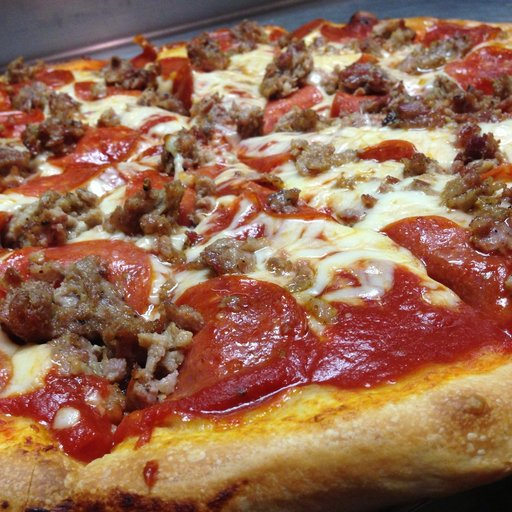

In [61]:
import random
from PIL import Image

# random.seed(42)

image_path_list  = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem


img = Image.open(random_image_path)
print(f"Image CLass : {image_class}")
print(f"Image Width : {img.width}")
print(f"Image height : {img.height}")

img

Image classpizza, Image shape: (512, 512, 3)


(-0.5, 511.5, 511.5, -0.5)

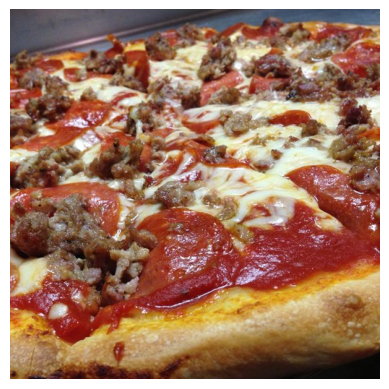

In [62]:
import numpy as np
image_array = np.asarray(img)

plt.imshow(image_array)
print(f"Image class{image_class}, Image shape: {image_array.shape}")
plt.axis(False)

In [103]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import  torchvision.transforms.v2 as transforms 

In [104]:
data_transform = transforms.Compose(
    [
        transforms.ToImage(),
        transforms.Resize(size=(128, 128)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToDtype(torch.float32,scale=True),
    ]
)

In [105]:
data_transform(Image.open(random_image_path))

Image([[[0.2824, 0.2706, 0.2667,  ..., 0.3020, 0.2941, 0.2902],
        [0.3098, 0.2980, 0.2863,  ..., 0.3020, 0.2941, 0.2863],
        [0.3176, 0.3294, 0.3333,  ..., 0.3020, 0.2941, 0.2902],
        ...,
        [0.0314, 0.0314, 0.0314,  ..., 0.5725, 0.4353, 0.5020],
        [0.0314, 0.0275, 0.0314,  ..., 0.4824, 0.3020, 0.3765],
        [0.0314, 0.0275, 0.0275,  ..., 0.5216, 0.4431, 0.4667]],

       [[0.3490, 0.3333, 0.3333,  ..., 0.2706, 0.2627, 0.2588],
        [0.3922, 0.3804, 0.3647,  ..., 0.2784, 0.2706, 0.2627],
        [0.4039, 0.4118, 0.4157,  ..., 0.2863, 0.2784, 0.2745],
        ...,
        [0.0314, 0.0314, 0.0314,  ..., 0.3961, 0.2549, 0.3137],
        [0.0314, 0.0275, 0.0314,  ..., 0.3098, 0.1216, 0.1882],
        [0.0314, 0.0275, 0.0275,  ..., 0.3333, 0.2471, 0.2510]],

       [[0.4627, 0.4471, 0.4471,  ..., 0.2941, 0.2863, 0.2824],
        [0.4745, 0.4706, 0.4667,  ..., 0.3059, 0.2980, 0.2902],
        [0.4980, 0.5137, 0.5294,  ..., 0.3176, 0.3137, 0.3098],
        ..

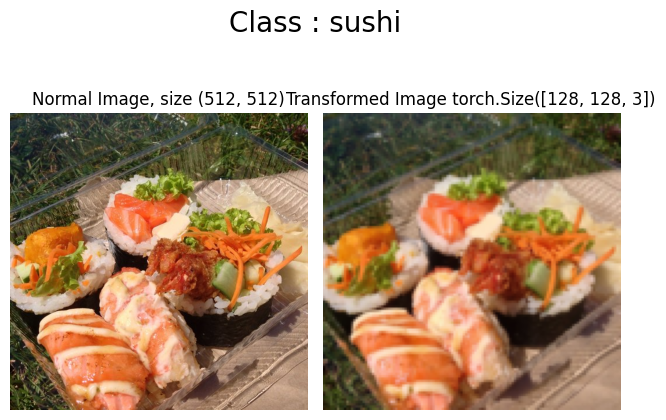

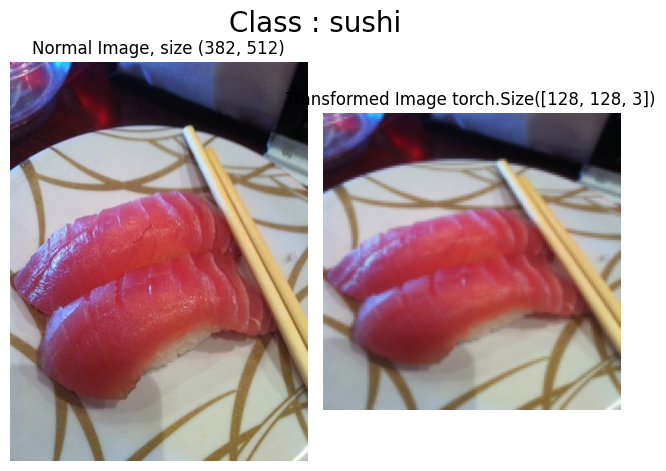

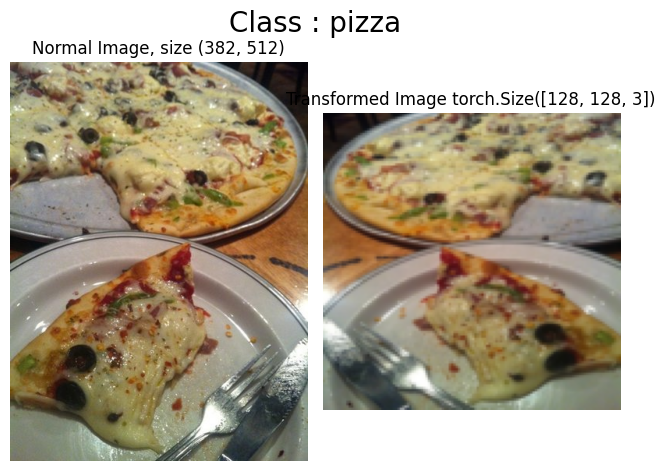

In [102]:
def plot_transformed_image(image_paths,transform,n=3,seed=None):
    random.seed(seed)
    image_path_list = random.sample(image_paths,k=n)

    for path in image_path_list:
        with Image.open(path) as img:
            fig,axes = plt.subplots(nrows=1,ncols=2)

            fig.suptitle(f"Class : {path.parent.stem}",fontsize=20)
            axes[0].set_title(f"Normal Image, size {img.size}")
            axes[0].imshow(img)
            axes[0].axis(False)

            transformed_image = torch.permute(input=transform(img), dims=(1, 2, 0))
            axes[1].set_title(f"Transformed Image {transformed_image.size()}")
            axes[1].imshow(transformed_image)
            axes[1].axis(False)
            plt.tight_layout()

plot_transformed_image(image_paths=image_path_list, transform=data_transform)

In [112]:
train_data = datasets.ImageFolder(root=train_dir,transform=data_transform,target_transform=None)

test_data = datasets.ImageFolder(
    root=test_dir, transform=data_transform, target_transform=None
)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                  ToImage()
                  Resize(size=[128, 128], interpolation=InterpolationMode.BILINEAR, antialias=True)
                  RandomHorizontalFlip(p=0.5)
                  ToDtype(scale=True)
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                  ToImage()
                  Resize(size=[128, 128], interpolation=InterpolationMode.BILINEAR, antialias=True)
                  RandomHorizontalFlip(p=0.5)
                  ToDtype(scale=True)
            ))

In [120]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [121]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [122]:
len(train_data),len(test_data)

(225, 75)

In [161]:
train_data.samples[0]

('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0)

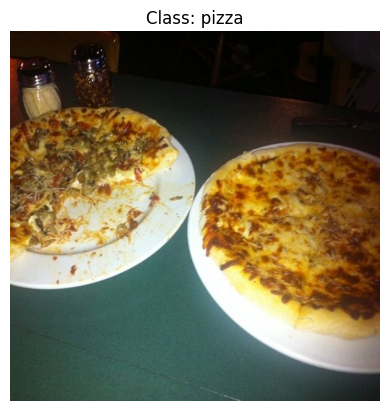

In [159]:
train_data.samples[0][0]

with Image.open(train_data.samples[0][0]) as f:
    plt.title(f"Class: {class_names[train_data.samples[0][1]]}")
    plt.imshow(f)
    plt.axis(False)

(-0.5, 127.5, 127.5, -0.5)

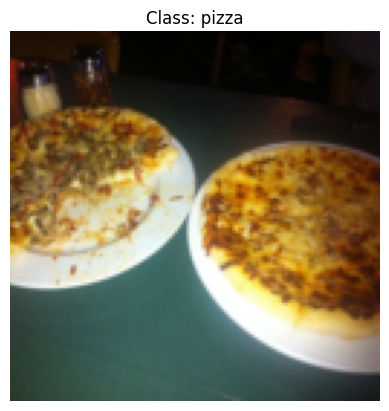

In [142]:
img,label = train_data[0][0], train_data[0][1]
plt.title(f"Class: {class_names[label]}")
plt.imshow(img.permute((1,2,0)))
plt.axis(False)

In [166]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,batch_size=32,shuffle=True)

In [184]:
print(f"Train data has {len(train_dataloader.dataset)} data, and {train_dataloader.batch_size} batch")

Train data has 225 data, and 32 batch
